### TP1

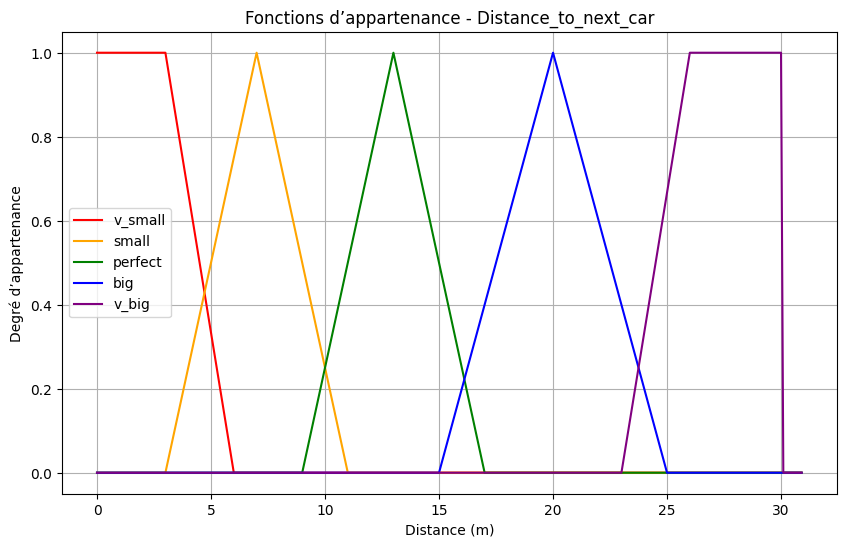

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Univers de discours
x_distance = np.arange(0, 31, 0.1)

# Fonctions d’appartenance
v_small = fuzz.trapmf(x_distance, [0, 0, 3, 6])
small   = fuzz.trimf(x_distance, [3, 7, 11])
perfect = fuzz.trimf(x_distance, [9, 13, 17])
big     = fuzz.trimf(x_distance, [15, 20, 25])
v_big   = fuzz.trapmf(x_distance, [23, 26, 30, 30])

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(x_distance, v_small, 'r', label='v_small')
plt.plot(x_distance, small, 'orange', label='small')
plt.plot(x_distance, perfect, 'g', label='perfect')
plt.plot(x_distance, big, 'blue', label='big')
plt.plot(x_distance, v_big, 'purple', label='v_big')
plt.title("Fonctions d’appartenance - Distance_to_next_car")
plt.xlabel("Distance (m)")
plt.ylabel("Degré d’appartenance")
plt.legend()
plt.grid()
plt.show()

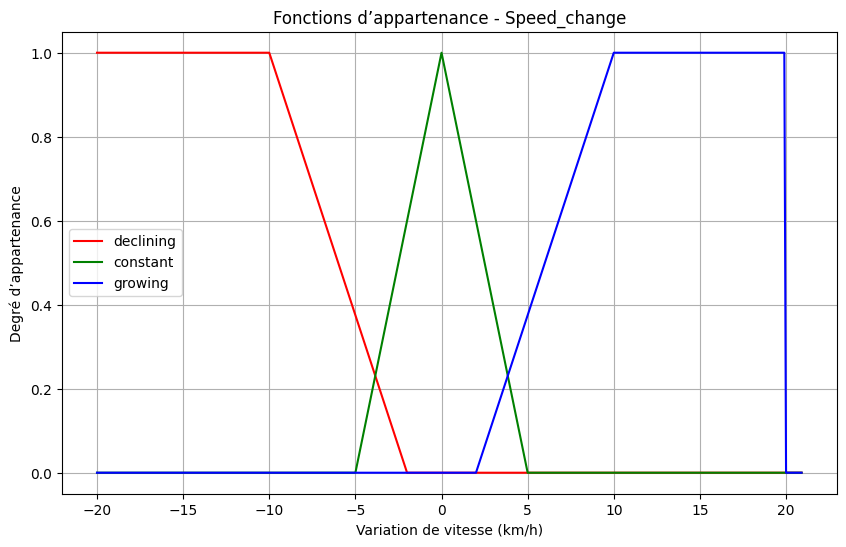

In [3]:
# Univers de discours
x_speed = np.arange(-20, 21, 0.1)

# Fonctions d’appartenance
declining = fuzz.trapmf(x_speed, [-20, -20, -10, -2])
constant  = fuzz.trimf(x_speed, [-5, 0, 5])
growing   = fuzz.trapmf(x_speed, [2, 10, 20, 20])

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(x_speed, declining, 'r', label='declining')
plt.plot(x_speed, constant, 'g', label='constant')
plt.plot(x_speed, growing, 'b', label='growing')
plt.title("Fonctions d’appartenance - Speed_change")
plt.xlabel("Variation de vitesse (km/h)")
plt.ylabel("Degré d’appartenance")
plt.legend()
plt.grid()
plt.show()


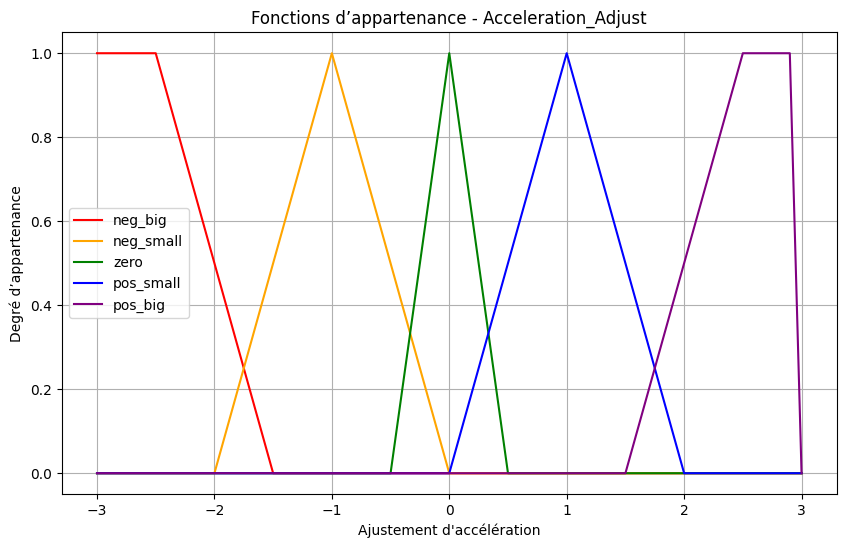

In [4]:
# Univers de discours
x_accel = np.arange(-3, 3.1, 0.1)

# Fonctions d’appartenance
neg_big   = fuzz.trapmf(x_accel, [-3, -3, -2.5, -1.5])
neg_small = fuzz.trimf(x_accel, [-2, -1, 0])
zero      = fuzz.trimf(x_accel, [-0.5, 0, 0.5])
pos_small = fuzz.trimf(x_accel, [0, 1, 2])
pos_big   = fuzz.trapmf(x_accel, [1.5, 2.5, 3, 3])

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(x_accel, neg_big, 'r', label='neg_big')
plt.plot(x_accel, neg_small, 'orange', label='neg_small')
plt.plot(x_accel, zero, 'g', label='zero')
plt.plot(x_accel, pos_small, 'blue', label='pos_small')
plt.plot(x_accel, pos_big, 'purple', label='pos_big')
plt.title("Fonctions d’appartenance - Acceleration_Adjust")
plt.xlabel("Ajustement d'accélération")
plt.ylabel("Degré d’appartenance")
plt.legend()
plt.grid()
plt.show()


Valeur de sortie (Acceleration_Adjust) : 0.244


c:\Users\USER\Desktop\tp__\myvenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


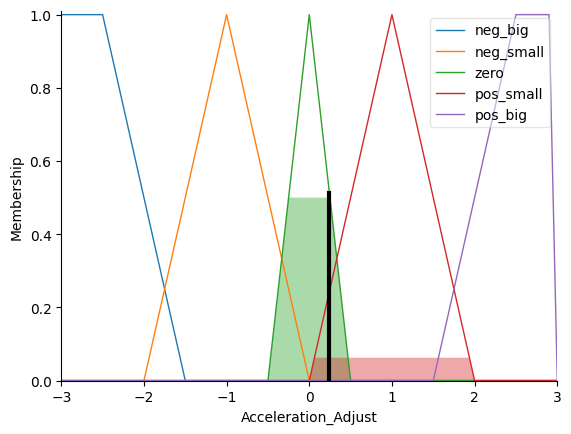

In [6]:
import skfuzzy.control as ctrl

# Variables floues
Distance_to_next_car = ctrl.Antecedent(np.arange(0, 31, 0.1), 'Distance_to_next_car')
Speed_change = ctrl.Antecedent(np.arange(-20, 21, 0.1), 'Speed_change')
Acceleration_Adjust = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

# Fonctions d’appartenance
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 3, 6])
Distance_to_next_car['small']   = fuzz.trimf(Distance_to_next_car.universe, [3, 7, 11])
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [9, 13, 17])
Distance_to_next_car['big']     = fuzz.trimf(Distance_to_next_car.universe, [15, 20, 25])
Distance_to_next_car['v_big']   = fuzz.trapmf(Distance_to_next_car.universe, [23, 26, 30, 30])

Speed_change['declining'] = fuzz.trapmf(Speed_change.universe, [-20, -20, -10, -2])
Speed_change['constant']  = fuzz.trimf(Speed_change.universe, [-5, 0, 5])
Speed_change['growing']   = fuzz.trapmf(Speed_change.universe, [2, 10, 20, 20])

Acceleration_Adjust['neg_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2.5, -1.5])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero']      = fuzz.trimf(Acceleration_Adjust.universe, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [1.5, 2.5, 3, 3])

# Règles floues
rule1  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small'])
rule2  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration_Adjust['neg_big'])
rule3  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big'])
rule4  = ctrl.Rule(Distance_to_next_car['small']   & Speed_change['declining'], Acceleration_Adjust['zero'])
rule5  = ctrl.Rule(Distance_to_next_car['small']   & Speed_change['constant'],  Acceleration_Adjust['neg_small'])
rule6  = ctrl.Rule(Distance_to_next_car['small']   & Speed_change['growing'],   Acceleration_Adjust['neg_big'])
rule7  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small'])
rule8  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration_Adjust['zero'])
rule9  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration_Adjust['neg_small'])
rule10 = ctrl.Rule(Distance_to_next_car['big']     & Speed_change['declining'], Acceleration_Adjust['pos_big'])
rule11 = ctrl.Rule(Distance_to_next_car['big']     & Speed_change['constant'],  Acceleration_Adjust['pos_small'])
rule12 = ctrl.Rule(Distance_to_next_car['big']     & Speed_change['growing'],   Acceleration_Adjust['zero'])
rule13 = ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['declining'], Acceleration_Adjust['pos_big'])
rule14 = ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['constant'],  Acceleration_Adjust['pos_big'])
rule15 = ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['growing'],   Acceleration_Adjust['pos_small'])

# Système de contrôle
speed_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
    rule9, rule10, rule11, rule12, rule13, rule14, rule15
])

simulation = ctrl.ControlSystemSimulation(speed_ctrl)

# Simulation pour Distance=13, Speed=-2.5
simulation.input['Distance_to_next_car'] = 13
simulation.input['Speed_change'] = -2.5
simulation.compute()

print("Valeur de sortie (Acceleration_Adjust) :", round(simulation.output['Acceleration_Adjust'], 3))

# Visualisation du résultat de la défuzzification
Acceleration_Adjust.view(sim=simulation)


### TP2

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [2]:

# Variables floues
Distance_to_next_car = ctrl.Antecedent(np.arange(0, 31, 0.1), 'Distance_to_next_car')
Speed_change = ctrl.Antecedent(np.arange(-20, 21, 0.1), 'Speed_change')
Acceleration_Adjust = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

# Fonctions d’appartenance
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 3, 6])
Distance_to_next_car['small']   = fuzz.trimf(Distance_to_next_car.universe, [3, 7, 11])
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [9, 13, 17])
Distance_to_next_car['big']     = fuzz.trimf(Distance_to_next_car.universe, [15, 20, 25])
Distance_to_next_car['v_big']   = fuzz.trapmf(Distance_to_next_car.universe, [23, 26, 30, 30])

Speed_change['declining'] = fuzz.trapmf(Speed_change.universe, [-20, -20, -10, -2])
Speed_change['constant']  = fuzz.trimf(Speed_change.universe, [-5, 0, 5])
Speed_change['growing']   = fuzz.trapmf(Speed_change.universe, [2, 10, 20, 20])

Acceleration_Adjust['neg_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2.5, -1.5])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero']      = fuzz.trimf(Acceleration_Adjust.universe, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [1.5, 2.5, 3, 3])

# Règles floues (mêmes que TP1)
rules = [
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['small']   & Speed_change['declining'], Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['small']   & Speed_change['constant'],  Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['small']   & Speed_change['growing'],   Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['big']     & Speed_change['declining'], Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['big']     & Speed_change['constant'],  Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['big']     & Speed_change['growing'],   Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['declining'], Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['constant'],  Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['growing'],   Acceleration_Adjust['pos_small']),
]

# Création du système de contrôle
control_system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(control_system)

# Génération du dataset
data = []
for _ in range(1000):
    d = np.random.uniform(0, 30)
    s = np.random.uniform(-20, 20)
    sim.input['Distance_to_next_car'] = d
    sim.input['Speed_change'] = s
    sim.compute()
    a = sim.output['Acceleration_Adjust']
    data.append([d, s, a])

df = pd.DataFrame(data, columns=['Distance_to_next_car', 'Speed_change', 'Acceleration_Adjust'])
df.head()


,Distance_to_next_car,Speed_change,Acceleration_Adjust
0,15.611115,17.786898,-0.876841
1,9.273390,15.052740,-2.106271
2,0.119594,-19.506697,-1.000000
3,2.003326,2.321233,-2.374232
4,8.975897,13.860083,-2.367950


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Données d'entrée et sortie
X = df[['Distance_to_next_car', 'Speed_change']]
y = df['Acceleration_Adjust']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [4]:
# Fonctions d'évaluation
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"🔹 {name}")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Régression Linéaire")
evaluate_model(y_test, y_pred_rf, "Random Forest")


🔹 Régression Linéaire
MAE : 0.3598
MSE : 0.1997

🔹 Random Forest
MAE : 0.0222
MSE : 0.0027



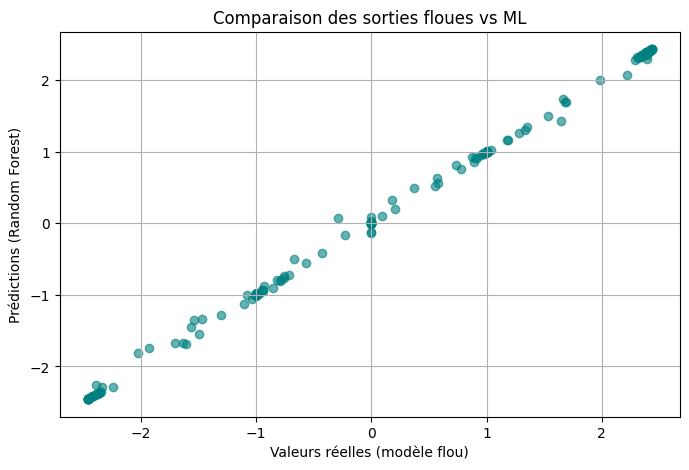

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='teal')
plt.xlabel("Valeurs réelles (modèle flou)")
plt.ylabel("Prédictions (Random Forest)")
plt.title("Comparaison des sorties floues vs ML")
plt.grid(True)
plt.show()
